In [13]:
from mip import *
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

# Model_S_diff r

# Parameter

In [14]:
N = 3
T = 10
set_N = set(range(N))
set_T = set(range(T))
d_s = [5000/(1+50*np.exp(-0.1*(t+1))) for t in set_T]
d_m = [279/(1+2.2*np.exp(-0.33*(t+1))) for t in set_T]
d_f = [258/(1+3.4*np.exp(-0.9*(t+1))) for t in set_T]
h = [2,2,2]
mu = [5,5,5]
r = 0
s = [50,50,50]
Pmax = [10,10,10]
delta = [5,5,5]
alpha = 2
M = 1000000
tau = []
for i in range(0,150):
    tau.append(i*0.01)
tau.remove(0.0)
g_list = []
for j in range(len(tau)):
    g = [[Pmax[i] - delta[i]*np.exp(-(t+1)/tau[j]) for t in set_T] for i in set_N]
    g_list.append(g)

In [15]:
np.array(g_list).shape

(149, 3, 10)

In [16]:
d = d_s

In [17]:
m_s = Model()
l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
#w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
+ r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))


In [18]:
obj_list_s=[]
m_s = Model()
l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
#w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
+ r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))

for j in range(len(g_list)):
    l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
    p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
    #w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
    w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

    m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
    + r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))
    
    #2
    for t in set_T:
            m_s += l[0][t] == xsum(p[0][t_p] - d[t_p] for t_p in range(t+1))

    #3
    for (i,t) in product(set_N-{0}, set_T):
            m_s += l[i][t] == xsum(p[i][t_p] - p[i-1][t_p] for t_p in range(t+1))

    #4
    for (i,t) in product(set_N,set_T):
            m_s += p[i][t] == xsum(w[i][t_p][t]*g_list[j][i][t-t_p] for t_p in range(t+1) )

    #5
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t] - w[i][t_p][t+1] <= y[i][t+1]*M

    #6
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t+1] - w[i][t_p][t] <= y[i][t+1]*M

    #7
    for (i,t) in product(set_N,set_T):
        #if y_a+y_w == 2:
            #alpha = 2
        #else: 
            #alpha = 1
        m_s += y_a[i][t] + y_w[i][t] <= alpha*y[i][t]

    #8
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t+1] == w[i][t_p][t] - w[i][t_p][t+1]

    #9
    for (i,t) in product(set_N,set_T):
        m_s += w[i][t][t] <= y_a[i][t]*M

    #10
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t] <= y_w[i][t]*M

    #11
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += z[i][t_p][t] >= 0


    #12
    for (i,t) in product (set_N,set_T):
        m_s += l[i][t] >= 0

    #13
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += w[i][t_p][t] >= 0 
        
    m_s.optimize()
    obj_list_s.append(m_s.objective_value)
    m_s = Model()
    


In [19]:
with open('tau-TRC2_r0.txt','w',encoding='UTF-8') as f:
    for i in obj_list_s:
        f.write(str(i)+'\n')
f.close()

### 저장된 TRC값 불러오기

In [25]:
obj_list_s = []
f = open('tau-TRC2_r0.txt','r')
linelist = f.readlines()
for line in linelist:
    line = float(line.rstrip())
    obj_list_s.append(line)
f.close()

In [26]:
obj_list_s

[3434.0123697953227,
 3434.0123697953227,
 3434.0123697953254,
 3434.012369793657,
 3434.012369547845,
 3434.012362858061,
 3434.0122947675336,
 3434.0119223734287,
 3434.0092350037385,
 3434.0028471606884,
 3433.9887359691675,
 3433.961979717111,
 3433.916711552547,
 3433.846741397438,
 3433.745906918055,
 3433.6085614044105,
 3433.42986980479,
 3433.2060041720238,
 3432.9342367568747,
 3432.6129510829364,
 3432.241592973202,
 3431.8205815191304,
 3431.35119652871,
 3430.835455173164,
 3430.275987050995,
 3429.675913933245,
 3429.0387381354035,
 3428.368241716694,
 3427.668397457111,
 3426.943291704939,
 3426.197058631814,
 3425.433825093647,
 3424.6576651227756,
 3423.872563002705,
 3423.082383882534,
 3422.290850932511,
 3421.5015281180067,
 3420.717807750167,
 3419.9429020662164,
 3419.179838177248,
 3418.4314558058622,
 3417.700407313286,
 3416.98915958523,
 3416.2999974071886,
 3415.6350280156616,
 3414.9961865591977,
 3414.3852422447294,
 3413.8038049815655,
 3413.2533323657262,

# r=0.5

In [20]:
r = 0.5

In [21]:
obj_list_s_r05=[]

m_s = Model()
l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
#w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
+ r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))

for j in range(len(g_list)):
    l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
    p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
    #w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
    w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

    m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
    + r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))
    
    #2
    for t in set_T:
            m_s += l[0][t] == xsum(p[0][t_p] - d[t_p] for t_p in range(t+1))

    #3
    for (i,t) in product(set_N-{0}, set_T):
            m_s += l[i][t] == xsum(p[i][t_p] - p[i-1][t_p] for t_p in range(t+1))

    #4
    for (i,t) in product(set_N,set_T):
            m_s += p[i][t] == xsum(w[i][t_p][t]*g_list[j][i][t-t_p] for t_p in range(t+1) )

    #5
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t] - w[i][t_p][t+1] <= y[i][t+1]*M

    #6
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t+1] - w[i][t_p][t] <= y[i][t+1]*M

    #7
    for (i,t) in product(set_N,set_T):
        #if y_a+y_w == 2:
            #alpha = 2
        #else: 
            #alpha = 1
        m_s += y_a[i][t] + y_w[i][t] <= alpha*y[i][t]

    #8
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t+1] == w[i][t_p][t] - w[i][t_p][t+1]

    #9
    for (i,t) in product(set_N,set_T):
        m_s += w[i][t][t] <= y_a[i][t]*M

    #10
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t] <= y_w[i][t]*M

    #11
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += z[i][t_p][t] >= 0


    #12
    for (i,t) in product (set_N,set_T):
        m_s += l[i][t] >= 0

    #13
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += w[i][t_p][t] >= 0 
        
    m_s.optimize()
    obj_list_s_r05.append(m_s.objective_value)
    m_s = Model()
    


In [22]:
with open('tau-TRC2_r05.txt','w',encoding='UTF-8') as f2:
    for i in obj_list_s_r05:
        f2.write(str(i)+'\n')
f2.close()

In [27]:
obj_list_s_r05 = []
f = open('tau-TRC2_r05.txt','r')
linelist = f.readlines()
for line in linelist:
    line = float(line.rstrip())
    obj_list_s_r05.append(line)
f.close()

with open('tau-TRC_r01.txt','w',encoding='UTF-8') as f3:
    for i in obj_list_s_r01:
        f3.write(str(i)+'\n')
f3.close()

# tau_TRC plot

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

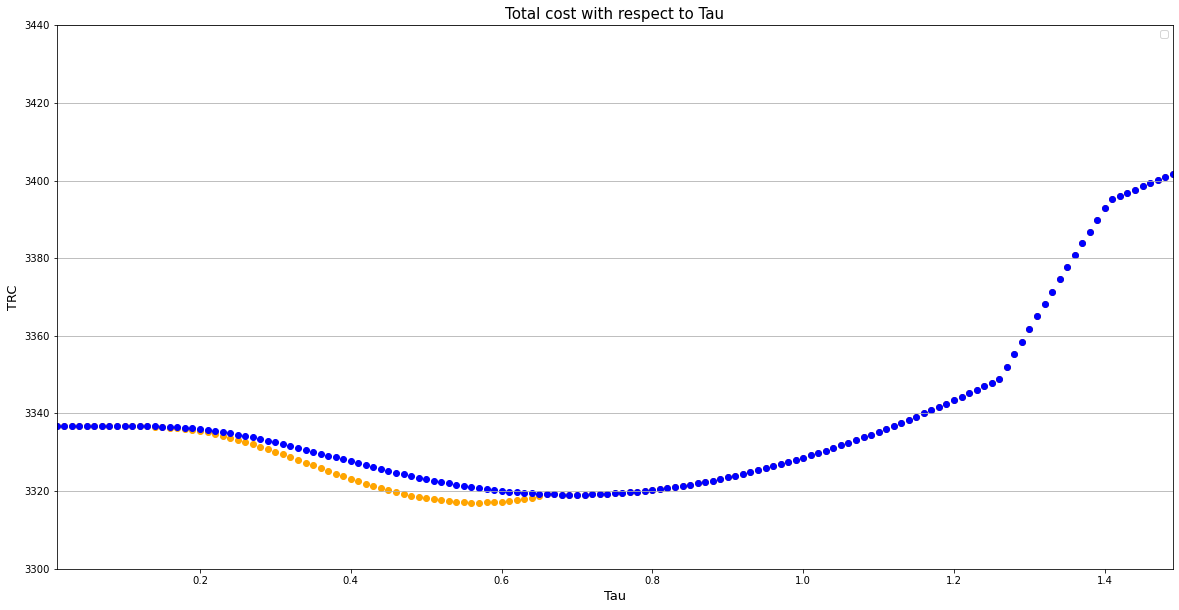

In [12]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_xlabel('Tau',fontsize=13)
plt.xlim(0.01,1.49)
plt.ylim(3300,3440)
ax.set_ylabel('TRC',fontsize=13)
ax.set_title('Total cost with respect to Tau', fontsize=15)
ax.legend()
ax.grid(axis='y')
plt.gcf().set_size_inches(20, 10)
plt.scatter(tau, obj_list_s, color='orange')
plt.scatter(tau, obj_list_s_r05, color='blue')